# Personal Loan Acceptance Prediction

**Internship Project Submission**

---

**Intern Name:** Ashna Imtiaz

**Internship Role:** Data Science Intern  

**Organization:** Developers Hub corporation

**Date:** July 22, 2025


# About Dataset:
This dataset contains data collected from **direct telemarketing campaigns** of a Portuguese banking institution. The objective of the campaigns was to promote **term deposit subscriptions**. The dataset includes various attributes related to the client's personal and banking information, as well as campaign-specific features.

---


### 1. **Client Personal Information**

Attributes related to demographic or personal details of the client:

* `age`: Age of the client
* `job`: Type of job (e.g., admin, blue-collar, etc.)
* `marital`: Marital status
* `education`: Education level
* `default`: Has credit in default? (yes/no)

---

### 2. **Client Banking Information**

Attributes related to the client's financial and loan status:

* `balance`: Average yearly account balance (in euros)
* `housing`: Has housing loan? (yes/no)
* `loan`: Has personal loan? (yes/no)

---

### 3. **Campaign-Specific Features**

Attributes related to the marketing campaign interactions:

* `contact`: Contact communication type (cellular, telephone)
* `day`: Last contact day of the month
* `month`: Last contact month
* `duration`: Duration of the last contact (in seconds)
* `campaign`: Number of contacts during this campaign
* `pdays`: Days since the client was last contacted
* `previous`: Number of contacts before this campaign
* `poutcome`: Outcome of the previous campaign

---

### 🎯 **Target Variable**

* `y`: Whether the client subscribed to a term deposit (`yes` / `no`)


# **Import Libraries**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# **Load Data**

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
# df_partial = pd.read_csv('bank.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# df_partial.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

# **Data Exploration and Analysis**

*   Understand the dataset structure and content.
*   Identify missing values, outliers, and data types.
*   Visualize data distributions and relationships between variables.

In [ ]:
df.shape, df_partial.shape

((45211, 17), (4521, 17))

In [ ]:
display(df.shape)
display(df.info())

(45211, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

In [ ]:
df.describe() # summary statistics

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### convert target to numeric if needed

In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'].value_counts()

,count
y,
0,39922
1,5289


# 1. AGE Analysis

**Analyze loan rate by age bins**(e.g., 18–30, 31–45...)

Age of customer (18–95); mean ~41

Moderate variation (std ≈ 10.6), right-skewed

Older customers: stable but possibly risk-averse


Age Summary:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


/tmp/ipython-input-30-900000748.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age'], kde=True, bins=30, palette='viridis')


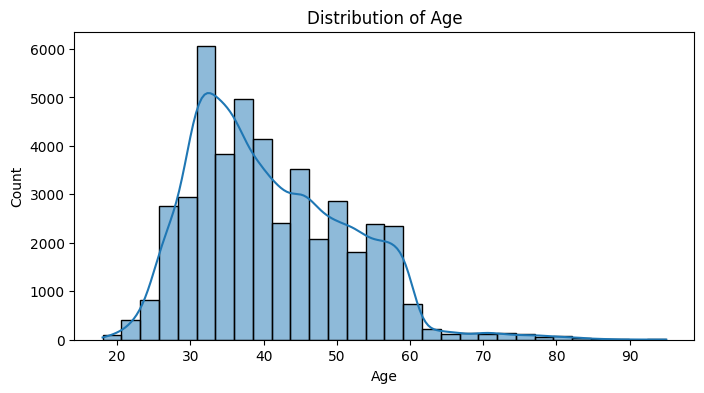

/tmp/ipython-input-30-900000748.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='y', data=df, palette='viridis')


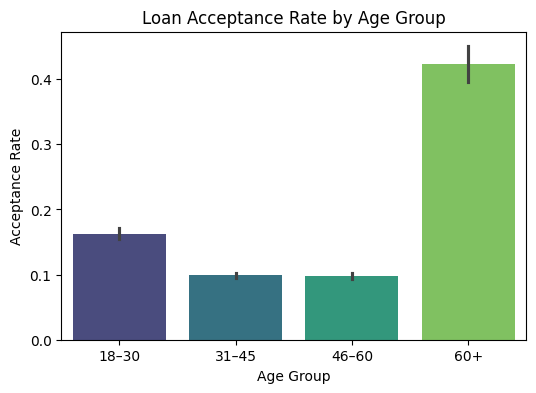

In [ ]:
# Summary
print("Age Summary:")
print(df['age'].describe())

# Histogram with KDE
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Age bins
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 100], labels=['18–30', '31–45', '46–60', '60+'])

# Loan acceptance by age group
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='y', data=df, palette='viridis')
plt.title('Loan Acceptance Rate by Age Group')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Group')
plt.show()

# 2. BALANCE Analysis

**extreme values or log-transform**

Avg yearly balance (range: -8019 to 102,127)

Skewed with outliers; high std dev

Negative → overdraft/debt; High → low loan need



Balance Summary:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


/tmp/ipython-input-31-2324776769.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['balance'], bins=50, kde=True, palette='viridis')


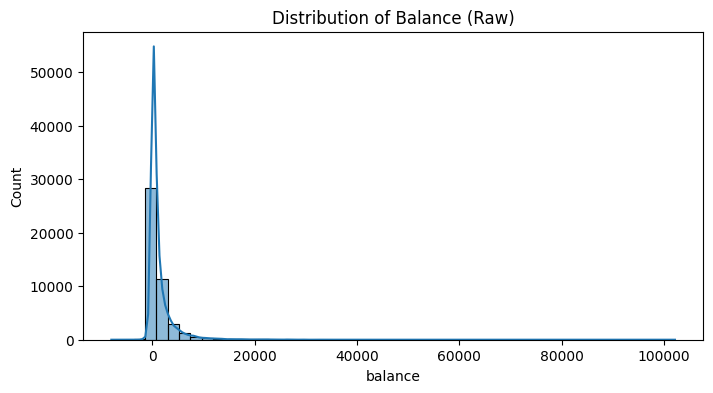

/tmp/ipython-input-31-2324776769.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['balance_capped'], bins=40, kde=True, palette='viridis')


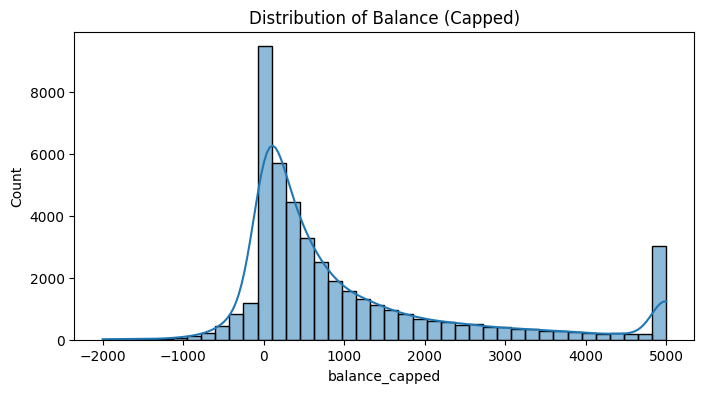

/tmp/ipython-input-31-2324776769.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balance_group', y='y', data=df, palette='viridis')


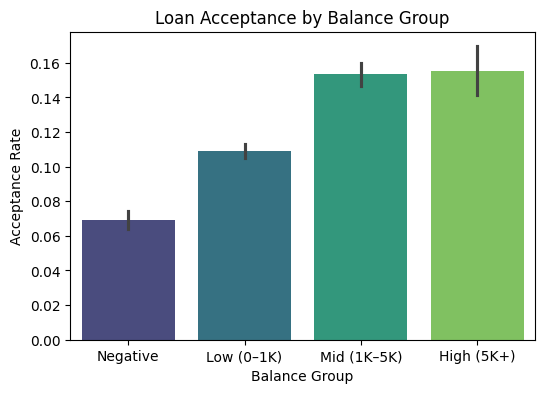

In [ ]:
# Summary
print("Balance Summary:")
print(df['balance'].describe())

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['balance'], bins=50, kde=True, palette='viridis')
plt.title('Distribution of Balance (Raw)')
plt.show()

# Optional: capped balance for cleaner visual
df['balance_capped'] = np.where(df['balance'] > 5000, 5000,
                          np.where(df['balance'] < -2000, -2000, df['balance']))

plt.figure(figsize=(8, 4))
sns.histplot(df['balance_capped'], bins=40, kde=True, palette='viridis')
plt.title('Distribution of Balance (Capped)')
plt.show()

# Bin balance
df['balance_group'] = pd.cut(df['balance'], bins=[-10000, 0, 1000, 5000, 100000],
                             labels=['Negative', 'Low (0–1K)', 'Mid (1K–5K)', 'High (5K+)'])

plt.figure(figsize=(6, 4))
sns.barplot(x='balance_group', y='y', data=df, palette='viridis')
plt.title('Loan Acceptance by Balance Group')
plt.ylabel('Acceptance Rate')
plt.xlabel('Balance Group')
plt.show()

## 3: Campaign Contacts vs Loan Acceptance
→ Too many contacts might reduce success; response rates by bin can be revealing.


Campaign Summary:
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


/tmp/ipython-input-32-3150526366.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['campaign'], bins=30, kde=False, palette='viridis')


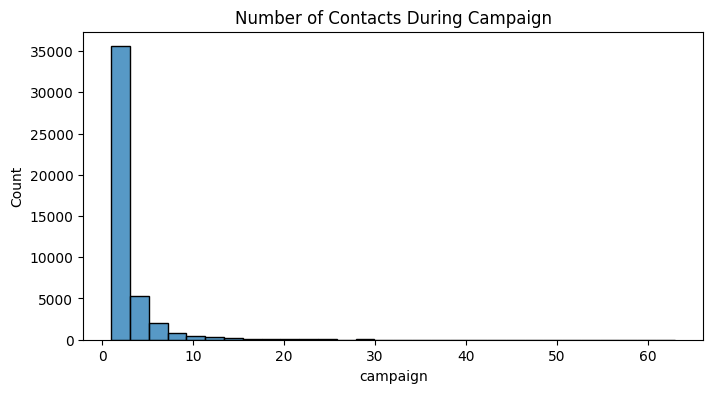

/tmp/ipython-input-32-3150526366.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_group', y='y', data=df, palette='viridis')


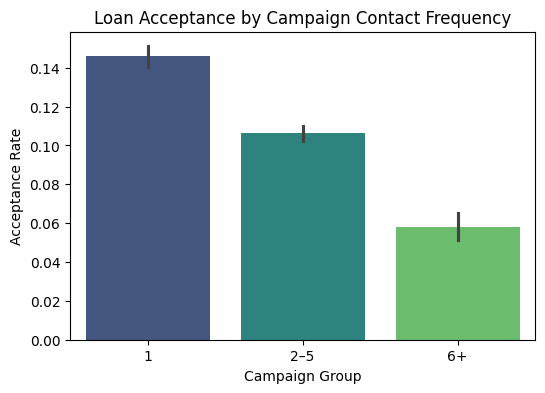

In [ ]:
# Summary
print("Campaign Summary:")
print(df['campaign'].describe())

# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['campaign'], bins=30, kde=False, palette='viridis')
plt.title('Number of Contacts During Campaign')
plt.show()

# Binned version
df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 1, 5, 100], labels=['1', '2–5', '6+'])

plt.figure(figsize=(6, 4))
sns.barplot(x='campaign_group', y='y', data=df, palette='viridis')
plt.title('Loan Acceptance by Campaign Contact Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('Campaign Group')
plt.show()

**Days Since Previous Contact (pdays)**
*   Recency of contact could correlate with engagement; useful when binned (e.g., never contacted vs. recently).

Pdays Summary:
count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


/tmp/ipython-input-33-229460335.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['pdays'], bins=50, palette='viridis')


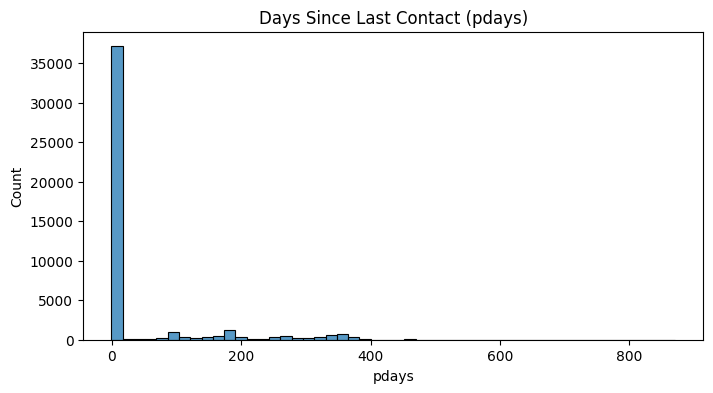

/tmp/ipython-input-33-229460335.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pdays_group', y='y', data=df, palette='viridis')


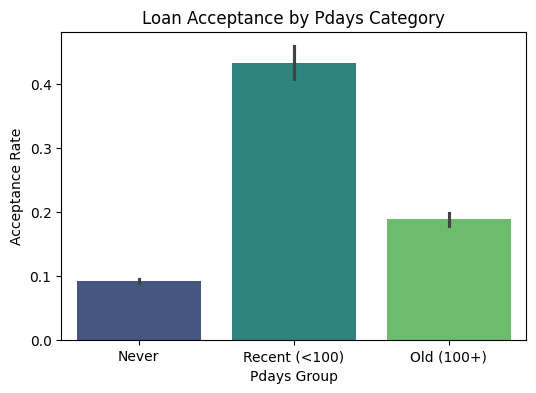

In [ ]:
# Summary
print("Pdays Summary:")
print(df['pdays'].describe())

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['pdays'], bins=50, palette='viridis')
plt.title('Days Since Last Contact (pdays)')
plt.show()

# Categorical version
df['pdays_group'] = pd.cut(df['pdays'], bins=[-2, -0.1, 100, 1000], labels=['Never', 'Recent (<100)', 'Old (100+)'])

plt.figure(figsize=(6, 4))
sns.barplot(x='pdays_group', y='y', data=df, palette='viridis')
plt.title('Loan Acceptance by Pdays Category')
plt.ylabel('Acceptance Rate')
plt.xlabel('Pdays Group')
plt.show()

In [4]:
# Categorize pdays into 3 Groups

def categorize_pdays(value):
    if value == -1:
        return 'never'
    elif value <= 100:
        return 'recent'
    else:
        return 'old'

df['pdays_category'] = df['pdays'].apply(categorize_pdays)

# Check the distribution
print(df['pdays_category'].value_counts())


pdays_category
never     36954
old        6820
recent     1437
Name: count, dtype: int64


**Previous Contacts Distribution**
*   May reveal patterns in persistent follow-ups; loyal or responsive customers could show different trends.

Previous Summary:
count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


/tmp/ipython-input-34-3558953548.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['previous'], bins=30, palette='viridis')


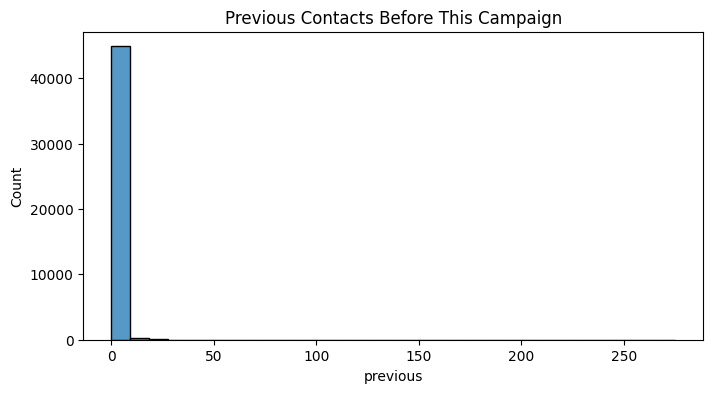

/tmp/ipython-input-34-3558953548.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='previous_group', y='y', data=df, palette='viridis')


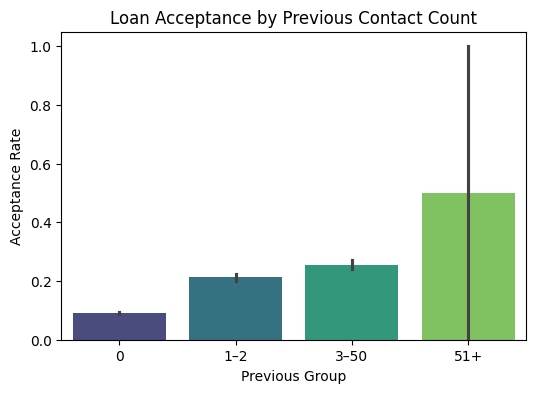

In [ ]:
# Summary
print("Previous Summary:")
print(df['previous'].describe())

# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['previous'], bins=30, palette='viridis')
plt.title('Previous Contacts Before This Campaign')
plt.show()

# Bin previous
df['previous_group'] = pd.cut(df['previous'], bins=[-1, 0, 2, 50, 300], labels=['0', '1–2', '3–50', '51+'])

plt.figure(figsize=(6, 4))
sns.barplot(x='previous_group', y='y', data=df, palette='viridis')
plt.title('Loan Acceptance by Previous Contact Count')
plt.ylabel('Acceptance Rate')
plt.xlabel('Previous Group')
plt.show()

In [ ]:
# Optional: Drop bin columns after EDA
# df.drop(columns=['age_group', 'balance_capped', 'campaign_group', 'pdays_group', 'previous_group'], inplace=True)
# Optional: Drop bin columns after EDA
df.drop(columns=['balance_capped'], inplace=True)


In [ ]:
df.drop(columns=['duration', 'pdays'], axis=1,  inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,pdays_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,0,never
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,0,never
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,0,never
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,0,never
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,0,never



# Define features and target

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

# **Data Preprocessing**

*   Encode categorical variables.
*   Scale numerical features.
*   Split data into training and testing sets.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'previous', 'poutcome',
       'y', 'pdays_category'],
      dtype='object')

In [ ]:
# Numerical & Categorical
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome', 'pdays_category']

In [ ]:
df[['age', 'balance', 'day', 'campaign', 'previous']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   previous  45211 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [ ]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'poutcome', 'pdays_category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job             45211 non-null  object
 1   marital         45211 non-null  object
 2   education       45211 non-null  object
 3   default         45211 non-null  object
 4   housing         45211 non-null  object
 5   loan            45211 non-null  object
 6   contact         45211 non-null  object
 7   month           45211 non-null  object
 8   poutcome        45211 non-null  object
 9   pdays_category  45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [7]:
df['job'].unique(), df['marital'].unique(), df['education'].unique(), df['default'].unique(), df['housing'].unique(), df['loan'].unique(), df['contact'].unique(), df['month'].unique(), df['poutcome'].unique(), df['pdays_category'].unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 array(['unknown', 'failure', 'other', 'success'], dtype=object),
 array(['never', 'old', 'recent'], dtype=object))

array(['married', 'single', 'divorced'], dtype=object)

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization numerical attributes

In [ ]:
scaler = StandardScaler()

### Encoding categorical attributes

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

### **ColumnTransformer**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', encoder, cat_cols)
    ]
)

# **Model Selection and Training**

*   Choose appropriate machine learning models.
*   Train models on the training data.
*   Tune hyperparameters using cross-validation.

### **logistic regression**

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Define classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# Define decision tree with balanced weights (no resampling needed)
dtree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

In [ ]:
# Use class_weight='balanced'.
# It handles nonlinearities and imbalance better than DT alone.
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    max_depth=10,
    random_state=42
)

In [ ]:
# Define model with scale_pos_weight = (class 0 count / class 1 count)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(scale_pos_weight=scale_weight,
                          use_label_encoder=False, eval_metric='logloss', random_state=42)



In [ ]:
from lightgbm import LGBMClassifier
gbm_model = LGBMClassifier(class_weight='balanced', random_state=42)

# **Pipeline**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', model)
])

In [ ]:
dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', model_dt)
])

In [ ]:
!pip install imbalanced-learn -q

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# Pipeline with SMOTE
pipeline_smote_lr = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logreg)
])

In [ ]:
# Pipeline for dtree with balanced weights
pipeline_dtree = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', dtree)
])

In [ ]:
# Pipeline for random forest with balanced weights
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', rf_model)
])


In [ ]:
# Build full pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', xgb_model)
])

In [ ]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', gbm_model)
])

best model is **RandomForestClassifier**(class_weight='balanced'), lets apply **GridSearchCV** with it.

In [ ]:
#  Define Randomized Search
random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# use 'recall' or 'roc_auc' depending on focus
# n_jobs=-1 uses all CPU cores for faster training.
# scoring='f1' focuses on improving minority class performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__max_depth': randint(5, 15),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

### **Fit model**

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
pipeline_smote_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Fit weighted dtree classifier
pipeline_dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

In [ ]:
# now I will train random forest after getting results from decision tree
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'day',
                                                                                'campaign',
                                                                                'previous']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['job',
                                                                                'marital',
                                                                                'education',
                                                                                'default',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome',
                                                                                'pdays_category'])])),
                                             ('classifier',
                                              RandomForestC...
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b41c2fae790>,
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b41c3103010>},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:52:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, call...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
pipeline_gbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome',
                                                   'pdays_category'])])),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

# **Model Evaluation**

*   Evaluate model performance on the testing data using relevant metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
*   Analyze confusion matrix.

In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.68      0.18      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
y_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.66      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



these two models have **very poor recall for class 1** (loan acceptance).

lets try SMOTE(to **oversample minority** class) pipeline:

In [ ]:
y_pred_lr = pipeline_smote_lr.predict(X_test)
# Evaluation
print("Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7952
           1       0.26      0.62      0.37      1091

    accuracy                           0.74      9043
   macro avg       0.60      0.69      0.60      9043
weighted avg       0.85      0.74      0.78      9043



In [ ]:
y_pred_dtree = pipeline_dtree.predict(X_test)
# Evaluation
print("Decision Tree with class_weight='balanced':")
print(classification_report(y_test, y_pred_dtree))

Decision Tree with class_weight='balanced':
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7952
           1       0.31      0.55      0.40      1091

    accuracy                           0.80      9043
   macro avg       0.62      0.69      0.64      9043
weighted avg       0.86      0.80      0.82      9043



In [ ]:
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest with class_weight='balanced':")
print(classification_report(y_test, y_pred_rf))

Random Forest with class_weight='balanced':
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7952
           1       0.35      0.59      0.44      1091

    accuracy                           0.82      9043
   macro avg       0.64      0.72      0.66      9043
weighted avg       0.87      0.82      0.84      9043



> `best parameters`

In [ ]:
print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'classifier__max_depth': 14, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 289}


In [ ]:
y_random_pred = random_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_random_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7952
           1       0.39      0.57      0.46      1091

    accuracy                           0.84      9043
   macro avg       0.66      0.72      0.68      9043
weighted avg       0.87      0.84      0.85      9043



In [ ]:
# Evaluate
y_pred = pipeline_xgb.predict(X_test)
print("🔍 XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7952
           1       0.36      0.57      0.44      1091

    accuracy                           0.83      9043
   macro avg       0.65      0.72      0.67      9043
weighted avg       0.87      0.83      0.84      9043



In [ ]:
# Evaluate
y_pred_gbm = pipeline_gbm.predict(X_test)
print("🔍 LGBM Classification Report:")
print(classification_report(y_test, y_pred_gbm))

🔍 LGBM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7952
           1       0.35      0.62      0.45      1091

    accuracy                           0.82      9043
   macro avg       0.65      0.73      0.67      9043
weighted avg       0.87      0.82      0.84      9043



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# **Conclusion and Future Work**

*   Summarize findings and model performance.
*   Discuss limitations and potential improvements.
*   Suggest future steps or research directions.

### *Tune Threshold for Better Class 1 Recall*

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get probabilities
y_proba = pipeline_xgb.predict_proba(X_test)[:, 1]

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Optional: Plot precision-recall vs threshold

# Set custom threshold (example: 0.3)
custom_threshold = 0.3
y_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate
print("📉 Classification Report with Threshold 0.3:")
print(classification_report(y_test, y_custom))


📉 Classification Report with Threshold 0.3:
              precision    recall  f1-score   support

           0       0.95      0.61      0.75      7952
           1       0.21      0.75      0.33      1091

    accuracy                           0.63      9043
   macro avg       0.58      0.68      0.54      9043
weighted avg       0.86      0.63      0.70      9043



## **bestest model so far**

In [ ]:
# Get probabilities
y_proba_gbm = pipeline_gbm.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### **Check ROC-AUC**

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"🔷 ROC-AUC Score: {roc_auc:.2f}")

🔷 ROC-AUC Score: 0.77


## **Plot Precision-Recall vs Threshold**

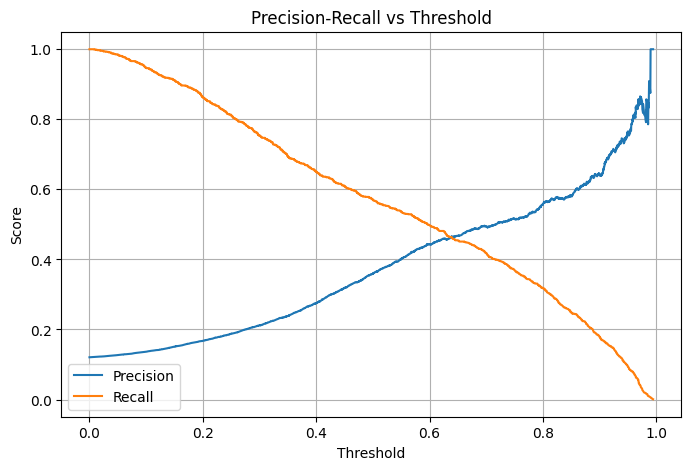

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


# **lgbm precision-recall**

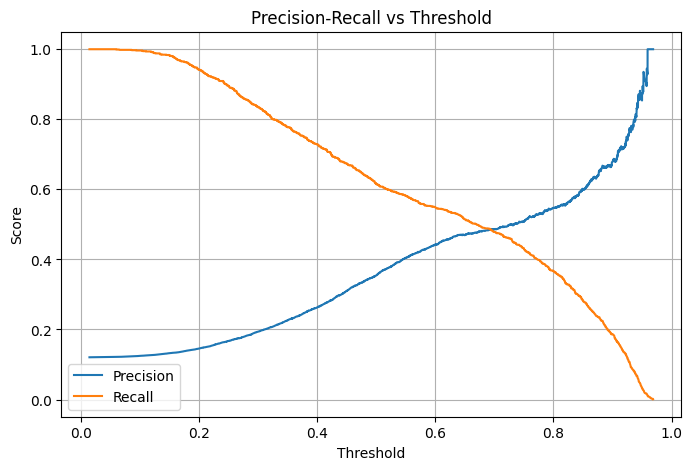

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gbm)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


### **Select Optimal Threshold**

>Automatically find the threshold where F1-score is maximized (good balance):

In [ ]:
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = 0

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best F1: {best_f1:.2f} at threshold: {best_threshold:.2f}")

Best F1: 0.47 at threshold: 0.59


**Threshold 0.59** is the point where our model achieves the *`best balance between precision and recall`*.

# **LGBM best threshold**

In [ ]:
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold_gbm = 0

for t in thresholds:
    y_pred_custom = (y_proba_gbm >= t).astype(int)
    f1 = f1_score(y_test, y_pred_custom)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold_gbm = t

print(f"Best F1: {best_f1:.2f} at threshold: {best_threshold_gbm:.2f}")

Best F1: 0.50 at threshold: 0.64


In [ ]:
from sklearn.metrics import recall_score

best_recall = 0
best_threshold_recall = 0

for t in thresholds:
    y_pred_custom = (y_proba_gbm >= t).astype(int)
    recall = recall_score(y_test, y_pred_custom)  # By default, pos_label=1
    if recall > best_recall:
        best_recall = recall
        best_threshold_recall = t

print(f"Best Recall: {best_recall:.2f} at threshold: {best_threshold_recall:.2f}")


Best Recall: 1.00 at threshold: 0.01


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

records = []

for t in thresholds:
    y_pred = (y_proba_gbm >= t).astype(int)
    records.append({
        'Threshold': round(t, 2),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

df_scores = pd.DataFrame(records)
print(df_scores[df_scores['Recall'] > 0.70].sort_values(by='F1', ascending=False).head(10))


      Threshold  Precision    Recall        F1
6211       0.42   0.284234  0.703941  0.404956
6210       0.42   0.284129  0.703941  0.404850
6209       0.42   0.284024  0.703941  0.404743
6208       0.42   0.283919  0.703941  0.404636
6212       0.42   0.283969  0.703025  0.404536
6207       0.42   0.283814  0.703941  0.404530
6206       0.42   0.283709  0.703941  0.404423
6205       0.42   0.283604  0.703941  0.404317
6204       0.42   0.283499  0.703941  0.404211
6199       0.42   0.283346  0.704858  0.404205


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Set threshold
threshold = 0.01

# Predict using the threshold
y_pred_01 = (y_proba_gbm >= threshold).astype(int)

# Calculate metrics
precision = precision_score(y_test, y_pred_01)
recall = recall_score(y_test, y_pred_01)
f1 = f1_score(y_test, y_pred_01)
accuracy = accuracy_score(y_test, y_pred_01)
conf_matrix = confusion_matrix(y_test, y_pred_01)
report = classification_report(y_test, y_pred_01)

# Print results
print(f"--- Metrics at Threshold = {threshold} ---")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")
print(f"Accuracy  : {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


--- Metrics at Threshold = 0.01 ---
Precision : 0.12
Recall    : 1.00
F1 Score  : 0.22
Accuracy  : 0.12

Confusion Matrix:
 [[   0 7952]
 [   0 1091]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7952
           1       0.12      1.00      0.22      1091

    accuracy                           0.12      9043
   macro avg       0.06      0.50      0.11      9043
weighted avg       0.01      0.12      0.03      9043



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


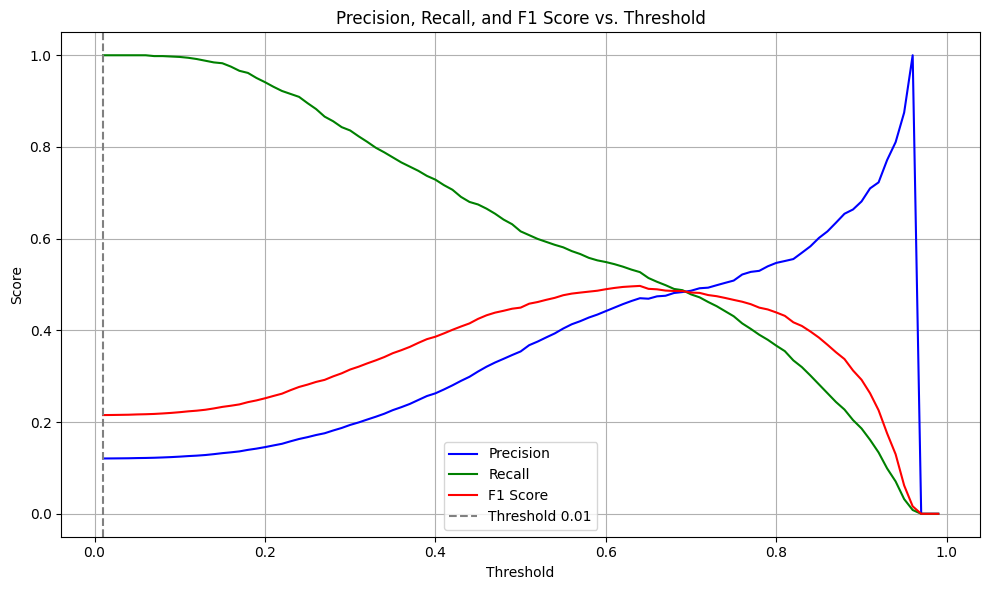

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Define thresholds (fine granularity)
thresholds = np.arange(0.01, 1.00, 0.01)

# Initialize lists to store scores
precisions = []
recalls = []
f1_scores = []

# Loop through thresholds
for t in thresholds:
    y_pred_custom = (y_proba_gbm >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_custom, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_custom))
    f1_scores.append(f1_score(y_test, y_pred_custom))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
plt.axvline(0.01, linestyle='--', color='gray', label='Threshold 0.01')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **The F1-score of 0.47 is your optimal tradeoff between:**

   * Avoiding too many false positives (precision),

   * Catching as many actual positives as possible (recall).



In [ ]:
y_pred_optimal = (y_proba >= 0.59).astype(int)
print("Final Optimized Performance:")
print(classification_report(y_test, y_pred_optimal))


Final Optimized Performance:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7952
           1       0.44      0.51      0.47      1091

    accuracy                           0.86      9043
   macro avg       0.68      0.71      0.69      9043
weighted avg       0.87      0.86      0.87      9043



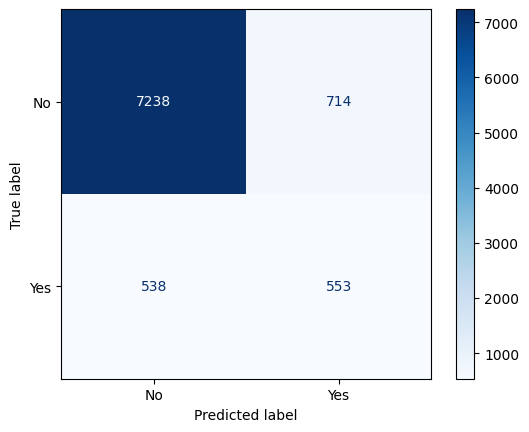

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap="Blues")


In [ ]:
cm

array([[7238,  714],
       [ 538,  553]])

# **Evaluate Final Metrics at That Threshold**

In [ ]:
y_final = (y_proba_gbm >= best_threshold).astype(int)
print(classification_report(y_test, y_final))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.47      0.53      0.50      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.72      0.71      9043
weighted avg       0.88      0.87      0.87      9043



# **Confusion Matrix**

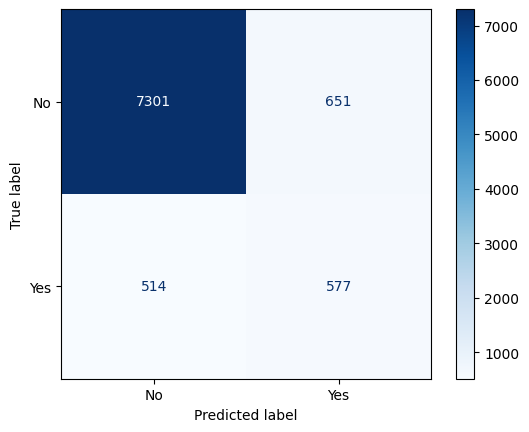

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap="Blues")


In [ ]:
cm

array([[7301,  651],
       [ 514,  577]])

# **Save the Full Pipeline**

In [ ]:
import joblib

# Save pipeline
joblib.dump(pipeline_gbm, 'lgbm_pipeline.pkl')
print("Pipeline saved as 'lgbm_pipeline.pkl'")


Pipeline saved as 'lgbm_pipeline.pkl'


## **Save the Optimal Threshold Separately**

In [ ]:
best_threshold_gbm

np.float64(0.64)

In [ ]:
# Save threshold
joblib.dump(best_threshold_gbm, 'optimal_threshold.pkl')
print("Threshold saved as 'optimal_threshold.pkl'")


Threshold saved as 'optimal_threshold.pkl'


In [ ]:
# for loading back
pipeline = joblib.load('lgbm_pipeline.pkl')
best_threshold = joblib.load('optimal_threshold.pkl')


In [ ]:
print(best_threshold)

0.64
